# Deep Learning Tutorials
---

Syllabus
---
1. Machine Learning Basic 
2. Neural Network & Training Techniques
3. Convlutional Neural Network & Recurrent Neural Network
4. Reinforcement Learning ( DQN & gym )


Machine Learning Basic
---

<img src="https://image.slidesharecdn.com/eventclassificationpredictionusingsupportvectormachine-160405104743/95/event-classification-prediction-using-support-vector-machine-4-638.jpg?cb=1459853447" alt="Drawing" style="width:600px;"/>

머신 러닝의 정의

A machine learning algorithm is an algorithm that is able to learn from data.But what do we mean by learning? Mitchell (1997) provides a succinct deﬁnition:“A computer program is said to learn from experience 'E' with respect to someclass of tasks 'T' and performance measure 'P', if its performance at tasks in 'T', asmeasured by 'P', improves with experience 'E'.” One can imagine a wide variety of experiences 'E', tasks 'T', and performance measures 'P'

Reference
---
- [Deep Learning Book, Ian Goodfellow - Ch5 Machine Learning Basics](http://www.deeplearningbook.org/)
- [Pattern Recognition and Machine Learning, Bishop](http://users.isr.ist.utl.pt/~wurmd/Livros/school/Bishop%20-%20Pattern%20Recognition%20And%20Machine%20Learning%20-%20Springer%20%202006.pdf)
- [자습해도 모르겠던 딥러닝, 머리속에 인스톨 시켜드립니다, 하용호](https://www.slideshare.net/yongho/ss-79607172)
- [Andrew Ng holehouse Deep Learning Lecture Note](http://www.holehouse.org/mlclass/01_02_Introduction_regression_analysis_and_gr.html)
- [Andrew Ng UFLDL Tutorial](http://ufldl.stanford.edu/tutorial/supervised/LinearRegression/)
- [PyTorch github](https://github.com/pytorch/examples)
- [Choosing a Machine Learning Framework in 2018](https://agi.io/2018/02/09/survey-machine-learning-frameworks/)


간단한 예제를 통해 위 정의를 알아보겠습니다.

Linear Regression (PyTorch Tutorial)
---
<img src="https://cdn-images-1.medium.com/max/1600/1*eLfDr8eXnYKY-VELQXmnSg.png" alt="Drawing" style="width: 500px;"/>

\begin{align} J(\theta) = \sum_{i=1} (h_\theta(x_i)-y_i)^2 \end{align}

\begin{align} h_\theta(x_i) = \theta^Tx_i + b \end{align}

\begin{align} \theta^* = \arg\min_\theta J(\theta) \end{align}

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

x_train = [[1.0], [2.0], [3.0], [4.0], [5.0]]
y_correct = [[2.0], [4.0], [6.0], [7.0], [9.0]]

class LinearRegressionModel(torch.nn.Module):

    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        
    def forward(self, x):
        out = self.linear(x)
        return out

epoch 0, loss 46.63531494140625
epoch 1, loss 27.203275680541992
epoch 2, loss 15.879233360290527
epoch 3, loss 9.280134201049805
epoch 4, loss 5.434495449066162
epoch 5, loss 3.1934375762939453
epoch 6, loss 1.8874506950378418
epoch 7, loss 1.1263760328292847
epoch 8, loss 0.6828498840332031
epoch 9, loss 0.4243752062320709
epoch 10, loss 0.2737394869327545
epoch 11, loss 0.18594683706760406
epoch 12, loss 0.13477644324302673
epoch 13, loss 0.10494740307331085
epoch 14, loss 0.08755528926849365
epoch 15, loss 0.07741077989339828
epoch 16, loss 0.07148988544940948
epoch 17, loss 0.06803043931722641
epoch 18, loss 0.06600548326969147
epoch 19, loss 0.06481646746397018


/home/junny/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number


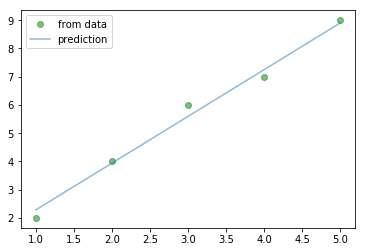

OrderedDict([('linear.weight', tensor([[1.6548]])), ('linear.bias', tensor([0.6295]))])


In [2]:
# Define model
model = LinearRegressionModel(1, 1)

criterion = torch.nn.MSELoss() # Mean Squared Loss
l_rate = 0.01
optimiser = torch.optim.SGD(model.parameters(), lr = l_rate) 

epochs = 20
for epoch in range(epochs):
    inputs = torch.autograd.Variable(torch.Tensor(x_train))
    labels = torch.autograd.Variable(torch.Tensor(y_correct))

    #clear grads as discussed in prev post
    optimiser.zero_grad()

    #forward to get predicted values
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward()# back props
    optimiser.step()# update the parameters
    print('epoch {}, loss {}'.format(epoch,loss.data[0]))

predicted = model.forward(torch.autograd.Variable(torch.Tensor(x_train))).data.numpy()

plt.plot(x_train, y_correct, 'go', label = 'from data', alpha = .5)
plt.plot(x_train, predicted, label = 'prediction', alpha = 0.5)
plt.legend()
plt.show()
print(model.state_dict())

이 예제에서는 결국 

Task 'T'는 linear regression, 즉 linear fitting이라고 보시면 되고,

Performance measure 'P'는 J값, 즉 이 예제에서는 실제값과의 차이의 제곱합이라고 보시면 되고,

Experience 'E'는 , parameter update 방식이 됩니다. 저희가 한 예제에서는 update방식 중 가장 정석인 Gradient Descent방식을 조금 활용한 SGD를 사용하였습니다.SGD에 대해서는 추후에 설명 드릴 것이며, 지금은 먼저 가장 정석인 GD즉 Gradient Descent를 살펴보겠습니다.



### Gradient Descent

<img src="http://www.stronglyconvex.com/assets/img/gradient_descent/animation.gif" alt="Drawing" style="width: 600px;"/>

\begin{align} \theta^\prime = \theta - \eta \nabla J(\theta) \end{align}

[Proof of Gradient Descent](http://www.stronglyconvex.com/blog/gradient-descent.html)

현재의 P(J값)의 편미분 값을 자코비안으로 가정한 이후 이를 통해서 parameter들을 update하는 방식이 바로 Gradient Descent방식입니다. 





위와 같은 흐름을 활용하여 이후 학자들은 선형분류, 비선형 분류, 비선형 regression등을 하기 위하여 아래와 같은 방식들을 고안해내고 사용하게 됩니다.


### SVM (Support Vector Machine)

![](http://dblab.xmu.edu.cn/blog/wp-content/uploads/2016/12/svm-400x400.png)
\begin{align}\min ||w||^2 \end{align}

\begin{align}y_i(w^Tx_i+b) \geq 1\end{align}

\begin{align} min \textit{L}_p(W,b,\alpha) = \frac{1}{2}||w||^2 - \sum\alpha_i[y_i(w^Tx_i+b)-1] \end{align}

\begin{align} \alpha_i[y_i(w^Tx_i+b)-1] = 0 \end{align}

\begin{align} y = sgn(w^{*T}x+b^*) \end{align}

\begin{align} y = sgn(\sum\alpha^*_iy_ix_i^Tx_i+b^*) \end{align}

![](https://www.researchgate.net/profile/M_Sayed_Mouchaweh/publication/278488437/figure/fig1/AS:328658981015552@1455369815377/Example-of-two-non-linearly-separable-classes-in-two-dimensional-feature-space.png)

![](https://image.slidesharecdn.com/eventclassificationpredictionusingsupportvectormachine-160405104743/95/event-classification-prediction-using-support-vector-machine-17-638.jpg?cb=1459853447)

(Reference: [Albert Orriols-Puig Slide Note, Lecture12 - SVM](https://www.slideshare.net/aorriols/lecture12-svm))



적은 데이터의 경우 이런식으로 사람이 직접 데이터 개형을 본 이후 구분짓는 함수 등을 정의한 이후 학습을 시키는 것이 가능했으나, 너무나 많고 복잡한 개형의 데이터들의 경우 사람이 직접 구분짓는 함수를 정의할 수 없었습니다. 이를 해결하기 위해서 나온 것이 바로 Neural Network입니다.



### Neural Network

\begin{align} y = f(w^T\phi(x)) \end{align}

\begin{align} J(\theta) = \sum_{i=1} (h_\theta(x_i)-y_i)^2 \end{align}

<img src="https://cdnpythonmachinelearning.azureedge.net/wp-content/uploads/2017/09/Single-Perceptron.png?x31195" alt="Drawing" style="width: 500px;"/>


\begin{align} y = \sigma(w^Tx) \end{align}

\begin{align} J(\theta) = \sum_{i=1} (\sigma(w^Tx_i)-y_i)^2 \end{align}



아래의 예제는 neural network가 어떻게 돌아가는 지 간단하게 알아볼 수 있는 예제입니다. 물론 간단히 알아보기 위함이기 때문에 Neural Network를 써야할 정도로 데이터 개수가 많거나 비선형적인 예제는 아니지만 개념만 알고 가기 위해 살펴봅시다.



In [3]:
import torch
print(torch.__version__)

0.4.1


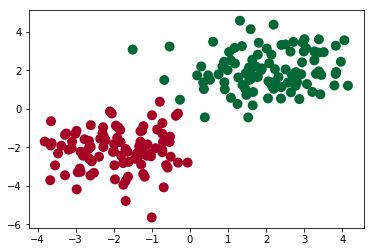

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=2, bias=True)
)


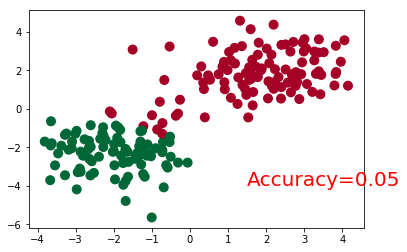

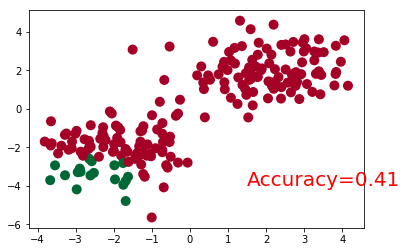

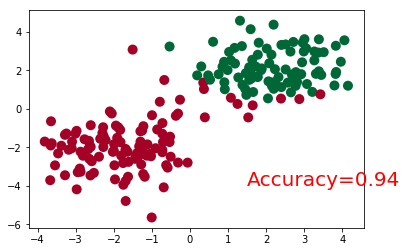

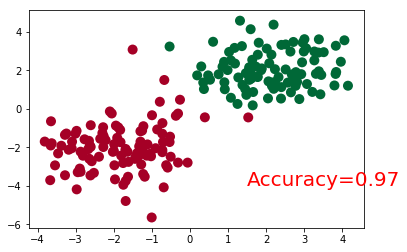

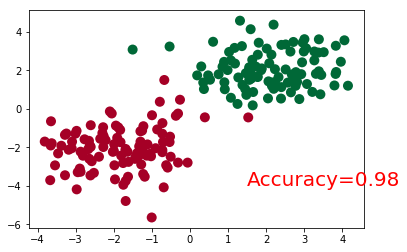

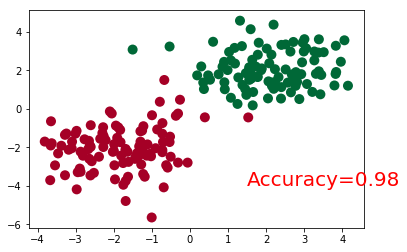

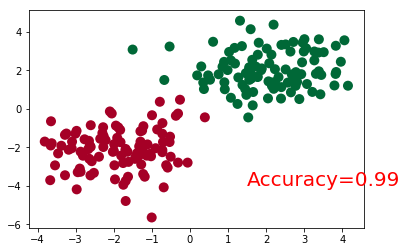

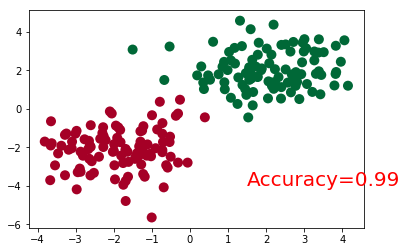

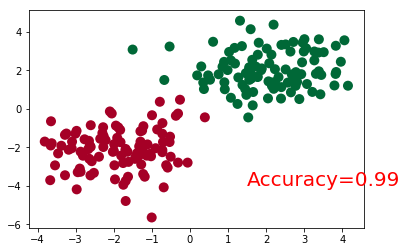

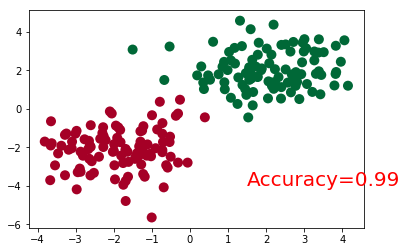

In [4]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt

# make fake data
n_data = torch.ones(100, 2)
# x data (tensor), shape=(100, 2)
x0 = torch.normal(2*n_data, 1)
x1 = torch.normal(-2*n_data, 1)
# y data (tensor), shape=(100, 2)
y0 = torch.cat((torch.zeros(100,1),torch.ones(100,1)),1)
y1 = torch.cat((torch.ones(100,1),torch.zeros(100,1)),1)

x = torch.cat((x0, x1), 0).type(torch.FloatTensor)  # shape (200, 2) FloatTensor = 32-bit floating
y = torch.cat((y0, y1), 0).type(torch.FloatTensor)    # shape (200, 2) LongTensor = 64-bit integer

plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy()[:,1], s=100, lw=0, cmap='RdYlGn')
plt.show()

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.out = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.softmax(self.hidden(x),1)      # activation function for hidden layer
        x = self.out(x)
        return x

net = Net(n_feature=2, n_hidden=10, n_output=2)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.02)
# loss_func = torch.nn.CrossEntropyLoss()  # the target label is NOT an one-hotted
loss_func = torch.nn.MSELoss()  # the target label is NOT an one-hotted

plt.ion()   # something about plotting

for t in range(500):
    out = net(x)                 # input x and predict based on x
    loss = loss_func(out, y)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 50 == 0:
        # plot and show learning process
        plt.cla()
        prediction = torch.max(out, 1)[1]
        pred_y = prediction.data.numpy().squeeze()
        target_one_hot = torch.max(y, 1)[1]
        target_y = target_one_hot.data.numpy().squeeze()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = float((pred_y == target_y).astype(int).sum()) / float(target_y.size)
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

데이터 개수도 많아지고 neural network를 사용하게 되면서 Gradient Descent를 사용하여 weight들을 update하는 경우 가장 optimal하지만 너무 연산시간이 많이 소요되는 부작용이 생기게 되었습니다. 이에 맨 처음 예제에서 잠깐 언급했던 SGD가 사용되기 시작합니다.


Gradient Descent
---
<img src="http://www.stronglyconvex.com/assets/img/gradient_descent/animation.gif" alt="Drawing" style="width: 600px;"/>

\begin{align} \theta^\prime = \theta - \eta \nabla J(\theta) \end{align}


### Stochastic Gradient Descent

<img src="https://image.slidesharecdn.com/random-170910154045/95/-40-638.jpg?cb=1505089848" alt="Drawing" style="width: 700px;"/>


물론 SGD를 통해 더 빠르게 수렴할 수 있었지만 이 마저도 아직 문제점들이 남아있었기에 사람들은 또 다른 알고리즘들을 제안하게 되었으며, 아래처럼 많은 알고리즘들이 생기게 되었습니다. 일반적으로 Adam을 많이 쓰며, 각 알고리즘들의 구체적인 아이디어는 직접 논문을 찾아보시는 것을 권장합니다.

### Other Methods

<img src="https://www.neuraldesigner.com/images/blog/gradient_descent_graph_big.png" alt="Drawing" style="width: 700px;"/>

<img src="https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/05/Comparison-of-Adam-to-Other-Optimization-Algorithms-Training-a-Multilayer-Perceptron.png" alt="Drawing" style="width: 500px;"/>

<img src="https://image.slidesharecdn.com/random-170910154045/95/-49-638.jpg?cb=1505089848
" alt="Drawing" style="width: 700px;"/>
